<a href="https://colab.research.google.com/github/estiven322M/Algoritmo-de-agrupamiento-no-supervisado-K-Means-con-python/blob/main/Actividad_AA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- Instalar librerías necesarias---

import pandas as pd # importar libreria pandas con alias "pd"
import matplotlib.pyplot as plt # importar módulo pyplot de la libreria matplotib con alias "plt"
import seaborn as sns # importar libreria seaborn con alias "sns"
import numpy as np # importar Numpy para calculo numerico para operar sobre arrays y matrices
import kagglehub # importar Kagglehub plataforma de data science para descargar datasets
# ---importar scipy para computación cientifica---
# modulo stats (estadisticas)
# importando la funcion 'mode' para encontrar valores que mas se repiten
from scipy.stats import mode
# --- importar libreria Scikit-learn, para Machine Learning en Python
from sklearn.preprocessing import StandardScaler
# --- importar módulo completo de estadísticas de la librería SciPy
# --- para pruebas estadísticas, y distribuciones de probabilidad
from scipy import stats
# ---comando de IPython
# para  que los gráficos generados por Matplotlib o Seaborn
# se muestren directamente en la celda de salida del notebook.
%matplotlib inline
from kagglehub import KaggleDatasetAdapter

# Ruta
ruta_archivo = "Iris.csv"

# Cargar datos con la funcion load()
dataframe= kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "saurabh00007/iriscsv",
  ruta_archivo

)

print("primeros 5 registros:", dataframe.head())
# Obtener medidas de las longitudes
dataframe['PetalLengthCm'].mean()
dataframe['PetalLengthCm'].std()
dataframe['PetalLengthCm'].min()
dataframe['PetalLengthCm'].max()

# Obtener estadísticos descriptivos
dataframe.describe()

Using Colab cache for faster access to the 'iriscsv' dataset.
primeros 5 registros:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Para realizar la exploración de los datos se usarán gráficos como: el diagrama de dispersioón y el diagrama de pares (diagrama de cajas y bigotes) para obser la variable categórica especies (species) y su variación de longitudes y anchos de los sápalos (**petal_length, petal_width**) y pétalos (**sepal_length, sepal_width**) para cada especie. Con este diagrama se puede comparar la variación de datos entre las diferentes especies.

In [3]:
var = 'Species'

datosLongitudSepalo = pd.concat([dataframe['SepalLengthCm'], dataframe[var]], axis=1)
datosAnchoSepalo = pd.concat([dataframe['SepalWidthCm'], dataframe[var]], axis=1)
datosLongitudPetalo = pd.concat([dataframe['PetalLengthCm'], dataframe[var]], axis=1)
datosAnchoPetalo = pd.concat([dataframe['PetalWidthCm'], dataframe[var]], axis=1)

print(datosLongitudSepalo.head(5))
print(datosAnchoSepalo.head(5))
print(datosLongitudPetalo.head(5))
print(datosAnchoPetalo.head(5))

   SepalLengthCm      Species
0            5.1  Iris-setosa
1            4.9  Iris-setosa
2            4.7  Iris-setosa
3            4.6  Iris-setosa
4            5.0  Iris-setosa
   SepalWidthCm      Species
0           3.5  Iris-setosa
1           3.0  Iris-setosa
2           3.2  Iris-setosa
3           3.1  Iris-setosa
4           3.6  Iris-setosa
   PetalLengthCm      Species
0            1.4  Iris-setosa
1            1.4  Iris-setosa
2            1.3  Iris-setosa
3            1.5  Iris-setosa
4            1.4  Iris-setosa
   PetalWidthCm      Species
0           0.2  Iris-setosa
1           0.2  Iris-setosa
2           0.2  Iris-setosa
3           0.2  Iris-setosa
4           0.2  Iris-setosa


**Graficar boxplot**

/tmp/ipython-input-2845626652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='SepalLengthCm', data=datosLongitudSepalo, palette=['blue','orange','green']) # se dibuja el boxplot
/tmp/ipython-input-2845626652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='SepalWidthCm', data=datosAnchoSepalo, palette=['blue','orange','green']) # se dibuja el boxplot
/tmp/ipython-input-2845626652.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='PetalLengthCm', data=datosLongitudPetalo, palette=['blue','orange','green'

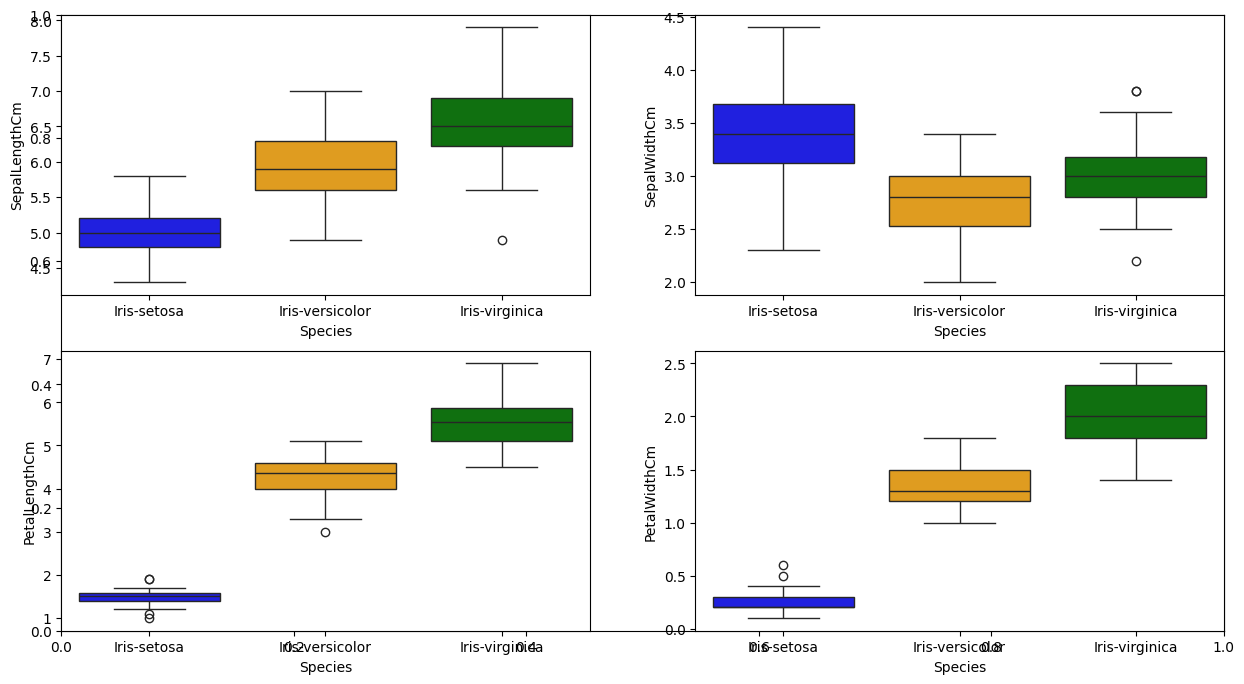

In [4]:
f, ax=plt.subplots(figsize=(15,8)) # área para graficar

plt.subplot(2,2,1) # definir posición para primer gráfico
sns.boxplot(x=var, y='SepalLengthCm', data=datosLongitudSepalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.subplot(2,2,2) # definir posición para segundo gráfico
sns.boxplot(x=var, y='SepalWidthCm', data=datosAnchoSepalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.subplot(2,2,3) # definir posición para tercer gráfico
sns.boxplot(x=var, y='PetalLengthCm', data=datosLongitudPetalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.subplot(2,2,4) # definir posición para cuarto gráfico
sns.boxplot(x=var, y='PetalWidthCm', data=datosAnchoPetalo, palette=['blue','orange','green']) # se dibuja el boxplot

plt.show()


**Especie Iris-setosa** (azul): Esta especie es claramente distinta a las otras dos. Se caracteriza por tener la menor longitud de sépalo (SepalLengthCm) pero, a su vez, la mayor anchura de sépalo (SepalWidthCm). Esta combinación la hace única.

**Especies Iris-versicolor** (naranja) y Iris-virginica (verde): La diferencia entre estas dos especies es menos evidente si solo observamos el sépalo.

**Longitud del Sépalo**: Iris-virginica tiende a tener sépalos más largos que Iris-versicolor, aunque existe una superposición en sus valores.

*Ancho del Sépalo*: Sus anchos de sépalo son muy similares, con rangos que también se superponen de manera significativa.

***Conclusión general sobre los Pétalos***: La diferencia más notable entre las tres especies se observa en las dimensiones de los pétalos. Iris-setosa tiene un pétalo mucho más corto y angosto que las otras dos, sin ninguna superposición. Los pétalos son, por tanto, el rasgo más distintivo entre las especies en este conjunto de datos.

#  Uso de Scatter Plot o Diagrama de Dispersión  

El **Scatter Plot** o **diagrama de dispersión** es una herramienta gráfica fundamental para visualizar la relación entre **dos variables numéricas** dentro de un conjunto de datos (*DataFrame*).  

---

## ¿Qué muestra?  
Este diagrama representa cada observación como un **punto en un plano cartesiano**, permitiendo analizar visualmente la **correlación entre las variables**:  

- **Relación Fuerte**  
  Los puntos forman un patrón claro y definido (por ejemplo, una línea ascendente o descendente).  

- **Relación Débil**  
  Los puntos están más esparcidos, pero aún se puede intuir una tendencia.  

- **Independencia**  
  Los puntos no muestran ningún patrón aparente, sugiriendo que no hay una relación clara entre las variables.  

---

**Conclusión:** El diagrama de dispersión es una herramienta clave en el **análisis exploratorio de datos (EDA)**, ya que facilita la identificación de tendencias, correlaciones y posibles outliers.  





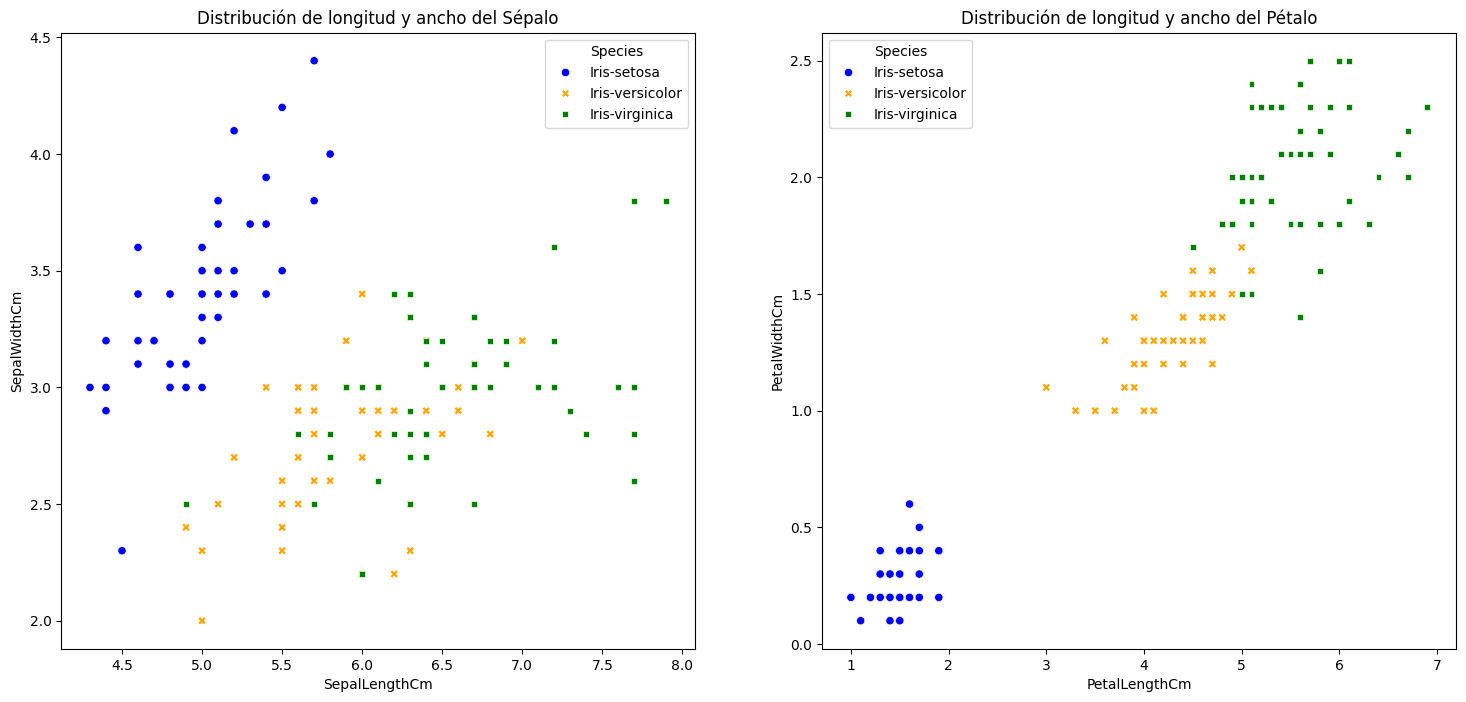

In [5]:
# --- Crear la figura y los ejes (subplots)
figura, axes = plt.subplots(1,2, figsize=(18,8))


# --- Graficar en el primer subplot (axes[0])
sns.scatterplot(
    data=dataframe,
    x='SepalLengthCm',
    y='SepalWidthCm',
    hue=var,
    style=var,
    palette=['blue','orange','green'],
    ax=axes [0]
)
axes[0].set_title('Distribución de longitud y ancho del Sépalo')

# --- Graficar en el segundo subplot (axes[1])
sns.scatterplot(
    data=dataframe,
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue=var,
    style=var,
    palette=['blue','orange','green'],
    ax=axes[1]
)
axes[1].set_title('Distribución de longitud y ancho del Pétalo')

plt.show()

# Conclusiones

---

## 1. Las dimensiones del Pétalo son mejores para distinguir especies  
El hallazgo más importante es que las medidas del **pétalo (largo y ancho)** son mucho más efectivas para diferenciar entre las tres especies que las medidas del **sépalo**.  

-  **Gráfico de pétalos (derecha):** los tres grupos de especies están **muy bien definidos y separados**.  
-  **Gráfico de sépalos (izquierda):** los grupos de *Iris-versicolor* e *Iris-virginica* se **superponen considerablemente**, dificultando su clasificación usando solo estas dos características.  

---

## 2. Características únicas de cada especie  

- **Iris-setosa (azul):**  
  - Es la especie más fácil de identificar.  
  - Tiene los pétalos más pequeños y aparece completamente **aislada** de las otras dos en el gráfico de pétalos.  
  - Sus sépalos tienden a ser **anchos pero no muy largos**.  

- **Iris-versicolor (naranja):**  
  - Ocupa una posición intermedia.  
  - Sus pétalos y sépalos son de tamaño **mediano**, más grandes que los de *setosa* pero más pequeños que los de *virginica*.  

- **Iris-virginica (verde):**  
  - Tiene los pétalos **más grandes** (en largo y ancho).  
  - Sus sépalos también tienden a ser los **más largos**.  

---

## 3. Fuerte correlación positiva en los Pétalos  
En las tres especies, pero especialmente en **versicolor** y **virginica**, se observa una **fuerte correlación positiva** entre la **longitud y el ancho del pétalo**.  

 Esto significa que:  
- A medida que el pétalo se hace **más largo**, también se hace **más ancho**.  
- Esta relación es **menos clara** en las dimensiones del sépalo.  

---


#  Refinamiento del algoritmo de agrupación  

La **agrupación de datos (clustering)** es un método de **clasificación no supervisada** cuyo objetivo es encontrar **patrones ocultos** en un conjunto de datos y organizarlos en grupos llamados **clústeres**.  

Este enfoque se utiliza en áreas como la **detección de anomalías**, la **medicina**, la **biología**, la **astronomía**, la **industria** y muchas más.  

---

##  Algoritmo K-Means  
Uno de los métodos más usados es **K-Means (K-medias)** debido a su **simplicidad** y **facilidad de implementación**.  

**Ventajas:**  
- Ofrece buenos resultados en muchos casos.  
- Es eficiente y rápido en datasets medianos.  

 **Desventajas:**  
- Tiene dificultades para identificar clústeres **no esféricos** o de **tamaños muy diferentes**.  
- Es sensible al **ruido** y a **datos atípicos**.  
- Requiere definir el número de clústeres (**k**) y depende de la **inicialización aleatoria de centroides**.  

---

##  Implementación con Scikit-learn  
Con el dataset **Iris**, se puede aplicar **K-Means** para agrupar los datos y descubrir patrones.  

Las variables utilizadas serán:  
- `sepal_length` (longitud del sépalo)  
- `sepal_width` (ancho del sépalo)  
- `petal_length` (longitud del pétalo)  
- `petal_width` (ancho del pétalo)  

Ejemplo de importación en Python:  

```python
from sklearn.cluster import KMeans


In [6]:
# --- Crear una lista que contiene los índice (etiquetas) seleccionados del dataframe
indice_muestra=[30, 51, 120]

# --- Crear DataFrame
# --- Se utiliza el metodo .loc[] para seleccionar filas del dataframe basandose en las etiquetas definidas (indices)
muestras=pd.DataFrame(dataframe.loc[indice_muestra], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
muestras # nombre del DataFrame

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
30,4.8,3.1,1.6,0.2
51,6.4,3.2,4.5,1.5
120,6.9,3.2,5.7,2.3


In [7]:
# --- Eliminar filas indicadas en las etiquetas
# Especificar con axis=0 el eje del cual se eliminan los datos, axis=0 se refiere a las filas (indices)
dataframe=dataframe.drop(indice_muestra, axis=0)

#  Preparación de los Datos para K-Means  

En **aprendizaje no supervisado**, como en el caso del algoritmo **K-Means**, no se trabaja con una variable dependiente (*Y*).  
En su lugar, se utilizan únicamente las **variables independientes** (*X*), que contienen las características del dataset.  

---

##  Definición de `X`  
En el dataset **Iris**, se seleccionan las columnas que representan:  

- `sepal_length` (longitud del sépalo)  
- `sepal_width` (ancho del sépalo)  
- `petal_length` (longitud del pétalo)  
- `petal_width` (ancho del pétalo)  

Esto se logra usando la función `.iloc[]` de **pandas**, que permite seleccionar filas y columnas por su posición:  

```python
# Selección de las 4 primeras columnas del dataset iris_df
X = iris_df.iloc[:, [0, 1, 2, 3]].values


In [8]:
# --- Seleccionar todas las filas y las colomnas de índice de 0 a 3
# --- la funcion .values convierte el DataFrame en un array de Numpy, listo para entrenar el modelo
X = dataframe.iloc[:, [0, 1, 2, 3]].values
print(X)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 [ 38.    4.9   3.1   1.5]
 

# Consideraciones sobre las variables  

Todas las variables del dataset **Iris** corresponden a **medidas en centímetros** de los **pétalos** y **sépalos**.  
Por este motivo, **no es necesario aplicar transformaciones adicionales** (como normalización o estandarización) antes de usar el algoritmo de **K-Means**.  

---

# Determinación del Valor Óptimo de K  

Para hallar el valor óptimo de **K** (número de clústeres) se aplicará el **método del codo (Elbow Method)**.  

Este consiste en:  
1. Ejecutar el algoritmo de **K-Means** para diferentes valores de **K**.  
2. Calcular la **inercia** (suma de distancias cuadradas de cada punto a su centroide).  
3. Graficar los resultados en función de **K**.  
4. Identificar el punto donde la disminución de la inercia se vuelve menos pronunciada (forma de “codo”).  

Ese punto indicará el **K óptimo** para el conjunto de datos.  


In [9]:
# --- Importar la clase Kmeans de la libreria scikit-learn la cual contiene la implementación del algoritmo
from sklearn.cluster import KMeans
# --- Inicializar lista vacia donde se van a guardar los valores de inercia calculados para cada numero de clusteres
inercia =[]
K_range=range(1,20) # Crear rango del 1 al 19, son los diferentes valores de k (número de clústeres que se vana probar
for k in K_range:
  # --- Crear instancia de K-Means. Establecer  el número máximo de iteraciones que el algoritmo realizará en un solo ciclo de ajuste.
  # --- Entrenar el algoritmo con los datos que están almacenados en la variable X con la funcion .fit(X)
  algoritmo=KMeans(n_clusters=k,max_iter=300).fit(X)
  # --- Despúes de entrenar el modelo, calcular la inercia. La incercia es la suma
  # --- de las distancias al cuadrado de cada punto de datos a su centroide más cercano.
  # --- un valor de inercia bajo indica que los clústeres son densos y están bien definidos
  inercia.append(algoritmo.inertia_) # Añadir el valor de inercia calculado: a la lista inercia

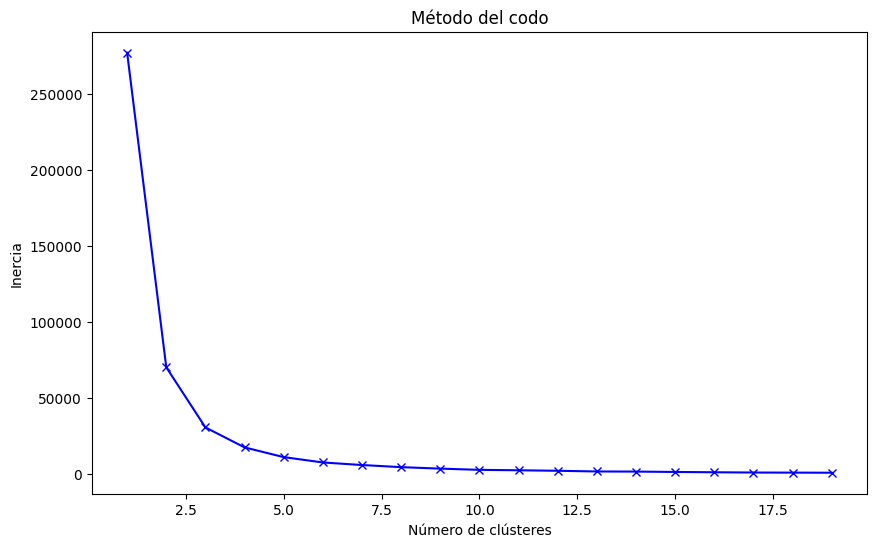

In [11]:
plt.figure(figsize=[10,6]) # Crear la figura para dibujar el gráfico
plt.title('Método del codo') # Añadir título al gráfico
plt.xlabel('Número de clústeres') # Establecer la etiqueta para el eje x
plt.ylabel('Inercia') # Establecer etiquea para el eje y
plt.plot(K_range, inercia, 'bx-') # K_range son los números de clústeres probados
plt.show()

#  Selección del valor de K  

Al analizar la gráfica del **método del codo**, se observa que el “codo” se encuentra entre los valores de **2.5 y 5**.  
Por tanto, se elige **K = 3** como el número óptimo de clústeres para el dataset Iris.  

---

#  Aplicación del Algoritmo K-Means  

Definido el valor de **K**, ya se puede aplicar el algoritmo de agrupamiento con el siguiente código:  

```python
from sklearn.cluster import KMeans

# Definir el modelo K-Means con K=3
algoritmo = KMeans(
    n_clusters=3,       # número de clústeres
    init='k-means++',   # inicialización de centroides
    max_iter=300,       # número máximo de iteraciones
    n_init=10,          # número de veces que se ejecutará con diferentes centroides
    random_state=42     # semilla para reproducibilidad
)


In [12]:
algoritmo=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
algoritmo.fit(X) # Definido el algoritmo y sus parametros se entrena junto con los datos de variable X

KMeans(n_clusters=3, n_init=10, random_state=42)

#  Resultados del algoritmo K-Means  

Una vez entrenado el algoritmo, se deben revisar dos resultados importantes:  

1. **Centroides**  
   - Son los puntos centrales de cada clúster.  
   - Representan la media de las características de todas las observaciones que pertenecen a ese grupo.  

2. **Etiquetas**  
   - Indican a qué clúster pertenece cada flor del dataset.  
   - Son simplemente identificadores (0, 1, 2) que asigna el modelo.  

---

## En Python  

```python
# Obtener los centroides
centroides = algoritmo.cluster_centers_
print("Centroides de los clústeres:")
print(centroides)

# Obtener las etiquetas asignadas a cada observación
etiquetas = algoritmo.labels_
print("\nEtiquetas de cada instancia:")
print(etiquetas)


In [13]:
# Obtener los centroides
centroides = algoritmo.cluster_centers_
print("Centroides de los clústeres:")
print(centroides)

# Obtener las etiquetas asignadas a cada observación
etiquetas = algoritmo.labels_
print("\nEtiquetas de cada instancia:")
print(etiquetas)

Centroides de los clústeres:
[[ 75.97959184   5.92653061   2.76122449   4.25510204]
 [125.59183673   6.58163265   2.96938776   5.54897959]
 [ 25.3877551    5.01020408   3.4244898    1.46122449]]

Etiquetas de cada instancia:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Segmentación de conjuntos de datos por atributos compartidos  

Una de las principales aplicaciones del **aprendizaje no supervisado** es la **segmentación de datasets**.  
- Cada **clúster** formado es **mutuamente excluyente** y se conoce como un **segmento**.  
- La técnica de agrupar observaciones en segmentos se denomina **segmentación**.  

En el ámbito empresarial, la segmentación permite identificar **diferentes preferencias de los clientes**, lo cual es clave para implementar estrategias de **mercadeo más efectivas** de productos y servicios.  

---

## Aplicaciones de la segmentación o Clustering  

- 🛒 **Identificación de patrones de compra** y generación de recomendaciones (ej. películas o series en plataformas de streaming).  
- 💳 **Detección de fraudes bancarios**.  
- ⚠️ **Detección de atípicos** o datos anómalos.  
- 🛡️ **Evaluación de riesgos de seguros**.  
- 🧑‍⚕️ **Análisis del comportamiento de los pacientes** en el sector salud.  
- 📂 **Clasificación de documentos** en grandes repositorios.  
- 🧬 **Identificación de síntomas** en estudios médicos o biológicos.  

---

**Conclusión:** la segmentación mediante clustering es una herramienta que permite **descubrir patrones ocultos** en los datos y tomar decisiones estratégicas en distintos ámbitos.  


# Visualización de Clústeres (Sépalos)  

En el caso del ejemplo propuesto, es conveniente **graficar los datos obtenidos en clústeres** para interpretar los resultados del algoritmo.  
A continuación, se muestra el código que utiliza las variables **longitud del sépalo** y **ancho del sépalo**:  






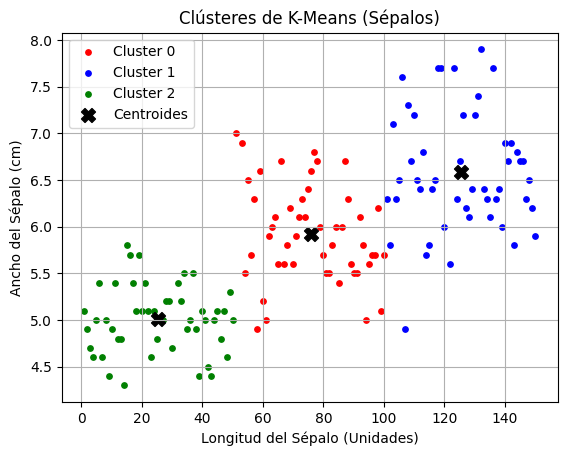

In [21]:
# Graficar los clústeres
plt.scatter(
    X[etiquetas==0,0],
    X[etiquetas==0,1],
    s=15,
    c='red',
    label='Cluster 0'
)
plt.scatter(
    X[etiquetas==1, 0],
    X[etiquetas==1,1],
    s=15,
    c='blue',
    label='Cluster 1'
)
plt.scatter(
    X[etiquetas==2, 0],
    X[etiquetas==2,1],
    s=15,
    c='green',
    label='Cluster 2'
)

# Graficar los centroides
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    s=100,
    c='black',
    marker='X',
    label='Centroides'
)

plt.title("Clústeres de K-Means (Sépalos)")
plt.xlabel("Longitud del Sépalo (Unidades)")
plt.ylabel("Ancho del Sépalo (cm)")
plt.legend()
plt.grid(True)
plt.show()


# Herramientas tecnológicas para el agrupamiento de datos

Todos los algoritmos de agrupación de observaciones buscan el mismo objetivo: **identificar clústeres basados en patrones ocultos en los datos**.  
Los puntos en el mismo clúster tienen características similares, mientras que aquellos con diferencias relevantes se agrupan en clústeres distintos.  

Algunos algoritmos de *clustering* más utilizados son:

### 🔹 Algoritmos de Clustering
Identifican grupos que se forman naturalmente, como **K-Means**, que se basa en la identificación de centroides en el espacio de dos o tres dimensiones.

### 🔹 Análisis de Componentes Principales (PCA)
Reduce la información de múltiples variables en algunos componentes principales, facilitando la búsqueda de patrones cuando existen muchos predictores.

### 🔹 Descomposición en Valores Singulares (SVD)
Técnica de reducción de dimensiones semejante al PCA, ampliamente utilizada en sistemas de recomendación.

### 🔹 DBSCAN
(*Density Based Spatial Clustering of Applications with Noise*).  
Algoritmo basado en densidades que también identifica **valores atípicos** al detectar observaciones que no cumplen con una densidad mínima.

### 🔹 Agrupamiento Jerárquico
Fusiona pares de clústeres hasta obtener un único clúster que contiene todos los datos. Sus resultados suelen representarse en un árbol llamado **dendograma**.

---

En Python, la librería **scikit-learn** facilita la implementación de estos algoritmos.  
Por ejemplo, el uso de **K-Means** puede realizarse de la siguiente manera:




In [23]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)


## Parámetros principales en `KMeans`

En el código fuente, la función **KMeans** recibe varios parámetros de entrada importantes:

- **`n_clusters`**:  
  Número de clústeres deseados.  
  Generalmente se obtiene con métodos como el **método del codo (Elbow Method)**.

- **`n_init`**:  
  Número de veces que el algoritmo se ejecutará de forma independiente con diferentes centroides aleatorios.  
  Se selecciona el modelo final con el **menor error**.

- **`max_iter`**:  
  Máximo número de iteraciones permitidas en cada ejecución única.

---

 **Nota:**  
El algoritmo se detiene automáticamente cuando los **centroides dejan de cambiar**, aunque no se haya alcanzado el número máximo de iteraciones.


## Otras técnicas de clusterización

Además de **K-Means tradicional**, existen otros enfoques y variantes para mejorar la calidad del agrupamiento:

- **Gráficos Silhouette (Silueta)**   
  Método utilizado para evaluar la calidad de un agrupamiento y seleccionar el valor óptimo de **K**.  
  Un valor cercano a **1** indica que los objetos están bien asignados a su clúster, mientras que valores cercanos a **0** o negativos sugieren solapamiento o mala asignación.

- **K-Means++**  
  Variante de K-Means que mejora el rendimiento mediante una inicialización más inteligente de los **centroides**, lo que reduce la probabilidad de obtener malas soluciones locales.

- **Clúster Jerárquicos**   
  Técnica que agrupa datos de manera jerárquica formando un árbol llamado **dendrograma**.  
  Se utiliza para descubrir relaciones entre datos sin necesidad de especificar de antemano el número de clústeres ni asumir estructuras esféricas.


## TensorFlow: una librería clave para IA y aprendizaje automático

**TensorFlow** es una de las librerías más importantes en el campo de la **inteligencia artificial (IA)** y el **aprendizaje automático (Machine Learning)**.  

-  Fue desarrollada y liberada por **Google**.  
- Permite realizar cálculos numéricos complejos de manera eficiente.  
-  Contiene herramientas para construir y entrenar **redes neuronales** y otros modelos de IA.  
- Funciona en múltiples plataformas y lenguajes, siendo **Python** el más utilizado.  

Su flexibilidad y escalabilidad la convierten en una herramienta fundamental tanto para la investigación como para aplicaciones en la industria.


## Validación del resultado del análisis

Al usar **algoritmos de machine learning**, ya sean supervisados o no supervisados, lo más importante es la **interpretación de los resultados**.  

En el caso de la **clusterización con K-Means**, se debe verificar si los clústeres encontrados tienen sentido lógico y cumplen con los objetivos del análisis.  

-  Si un clúster tiene muy pocos o demasiados datos, lo más responsable es **repetir el análisis** con una mejor inicialización de centroides u otro valor de **K**.  
- Una variable clave es la **distancia euclídea** entre cada punto y su centroide:  
  - Sus promedios deben tener una **variabilidad moderada**.  
  - Si no se cumple, se recomienda repetir el proceso.  
- También es importante medir qué tan separados están los clústeres entre sí.  

---

### Medidas importantes en la validación de clústeres

- **Cohesión**   
  Distancia promedio del centroide a todos los puntos dentro del mismo clúster.  
  Una baja cohesión indica que los puntos están muy dispersos.

- **Separación**   
  Distancia promedio entre un centroide y los centroides de otros clústeres.  
  Una buena separación significa que los clústeres están bien diferenciados.

---

Para finalizar el proceso, se deben usar las **muestras separadas inicialmente** y observar:  
1. A qué clúster pertenecen.  
2. Los resultados preliminares que predice el algoritmo.  

En este caso, se retoma la prueba original consistente en **tres observaciones**.


## Predicción y ubicación de nuevas muestras en los clústeres

En este punto, se toman algunas **muestras de prueba** y se predice a qué clúster pertenecen:

```python
# Selección de columnas relevantes (longitudes y anchos de sépalos y pétalos)
Xmuestras = muestras.iloc[:, [0, 1, 2, 3]].values  

# Predicción de los clústeres a los que pertenecen las muestras
YMuestraPrediccion = algoritmo.predict(Xmuestras)

print(YMuestraPrediccion)


In [24]:
Xmuestras = muestras.iloc[:, [0, 1, 2, 3]].values
YMuestraPrediccion = algoritmo.predict(Xmuestras)
print(YMuestraPrediccion)

[2 2 2]


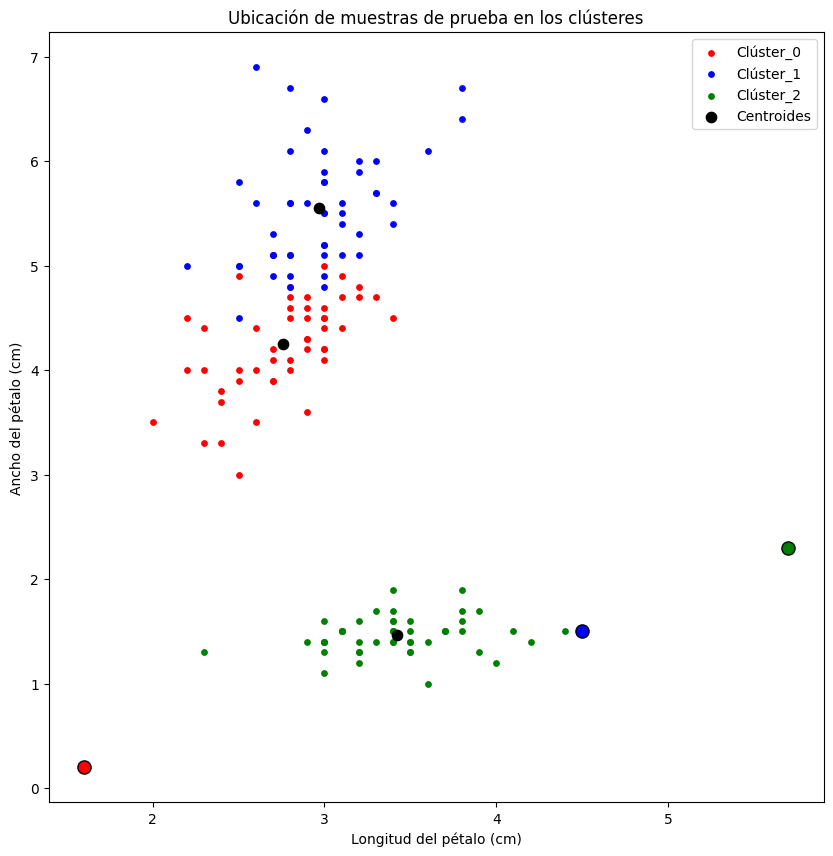

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=[10, 10])

# Graficar clústeres
plt.scatter(X[etiquetas == 0, 2], X[etiquetas == 0, 3], s=15, c='red', label='Clúster_0')
plt.scatter(X[etiquetas == 1, 2], X[etiquetas == 1, 3], s=15, c='blue', label='Clúster_1')
plt.scatter(X[etiquetas == 2, 2], X[etiquetas == 2, 3], s=15, c='green', label='Clúster_2')

# Graficar centroides
plt.scatter(centroides[:, 2], centroides[:, 3], s=55, c='black', label='Centroides')

# Dibujar las muestras iniciales
plt.scatter(Xmuestras[0, 2], Xmuestras[0, 3], s=90, c='red', edgecolors='black')
plt.scatter(Xmuestras[1, 2], Xmuestras[1, 3], s=90, c='blue', edgecolors='black')
plt.scatter(Xmuestras[2, 2], Xmuestras[2, 3], s=90, c='green', edgecolors='black')

plt.legend()
plt.title("Ubicación de muestras de prueba en los clústeres")
plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.show()
